   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  

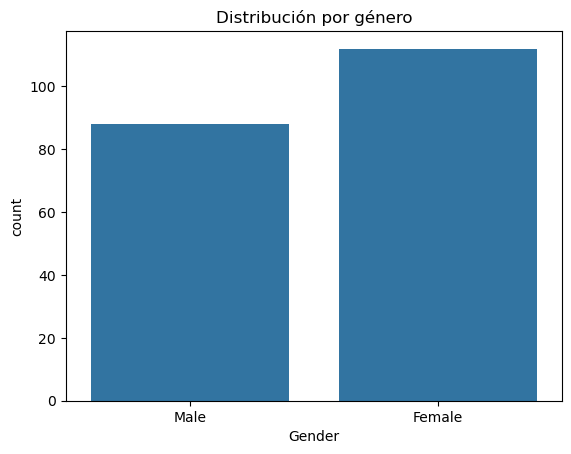

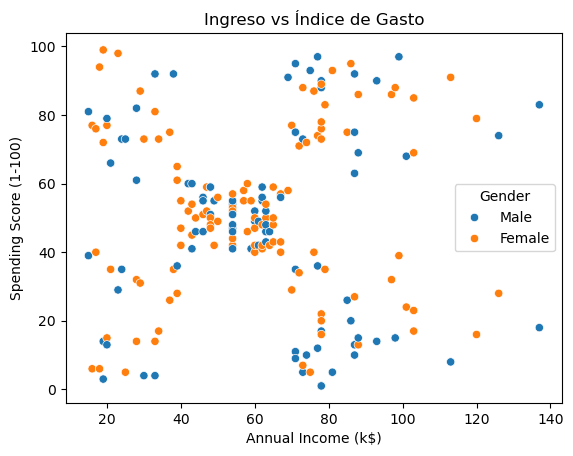

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar dataset (ajustado con ruta correcta)
df = pd.read_csv(r"C:\Analisis de datos\Mall_Customers.csv")

# Ver primeras filas
print(df.head())

# Información general
print(df.info())

# Estadísticas básicas
print(df.describe())

# Ver cuántos valores únicos hay por columna
print(df.nunique())

# Verificar valores faltantes
print(df.isnull().sum())

# Visualización: distribución por género
sns.countplot(data=df, x='Gender')
plt.title("Distribución por género")
plt.show()

# Visualización: relación entre ingreso anual y gasto
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender')
plt.title("Ingreso vs Índice de Gasto")
plt.show()


In [4]:
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})

In [5]:
df = df.drop('CustomerID', axis=1)

In [6]:
print(df.isnull().sum())

Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
from sklearn.preprocessing import StandardScaler

# Crear el escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
df_scaled = scaler.fit_transform(df)

# Convertir a DataFrame
import numpy as np
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Verificar resultado
print(df_scaled.head())

     Gender       Age  Annual Income (k$)  Spending Score (1-100)
0  1.128152 -1.424569           -1.738999               -0.434801
1  1.128152 -1.281035           -1.738999                1.195704
2 -0.886405 -1.352802           -1.700830               -1.715913
3 -0.886405 -1.137502           -1.700830                1.040418
4 -0.886405 -0.563369           -1.662660               -0.395980


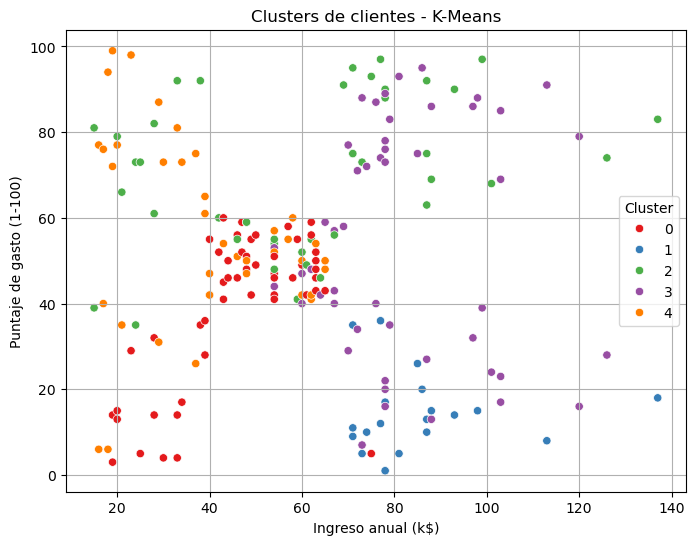

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizar los clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster_KMeans', palette='Set1')
plt.title("Clusters de clientes - K-Means")
plt.xlabel("Ingreso anual (k$)")
plt.ylabel("Puntaje de gasto (1-100)")
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


In [11]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score

# Usamos los datos escalados (df_scaled) y las etiquetas de cluster
silhouette = silhouette_score(df_scaled, kmeans.labels_)
calinski = calinski_harabasz_score(df_scaled, kmeans.labels_)

print(f"Coeficiente de Silhouette: {silhouette:.3f}")
print(f"Índice de Calinski-Harabasz: {calinski:.2f}")


Coeficiente de Silhouette: 0.272
Índice de Calinski-Harabasz: 62.13


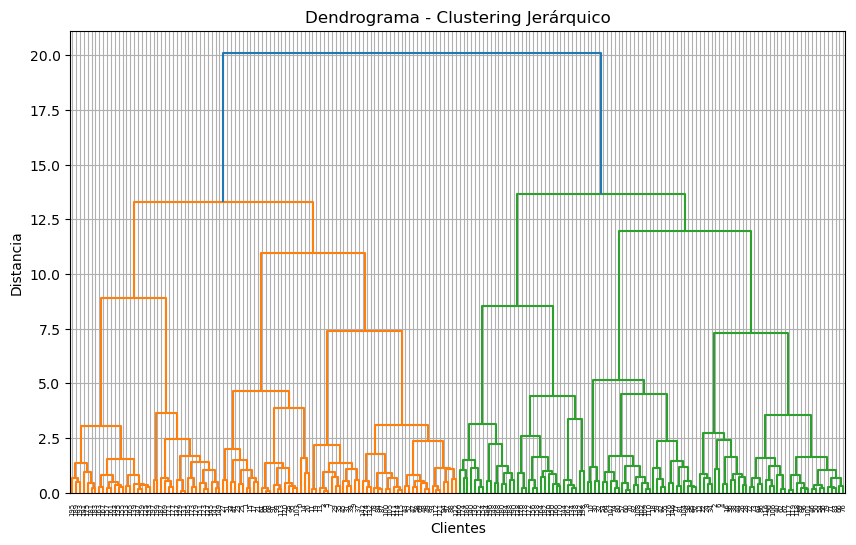

In [12]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(df_scaled, method='ward'))
plt.title("Dendrograma - Clustering Jerárquico")
plt.xlabel("Clientes")
plt.ylabel("Distancia")
plt.grid(True)
plt.show()
